<a href="https://colab.research.google.com/github/SolarHO/FX_predict/blob/main/LSTM_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

#1. Î™®Îç∏ÌïôÏäµ

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_csv("Î≥ëÌï©ver3.csv")
df['ÎÇ†Ïßú'] = pd.to_datetime(df['ÎÇ†Ïßú'])

##1-1 ÎèÖÎ¶ΩÎ≥ÄÏàò : Îã¨Îü¨ÏßÄÏàò, CRB
Í∏∞Í∞Ñ: Ï†ÑÏ≤¥ (2001~2025), ÏµúÍ∑º (2020Ïù¥ÌõÑ)

Íµ¨Ï°∞: 10Ïùº ÏãúÌÄÄÏä§Î°ú Îã§ÏùåÎÇ† ÏòàÏ∏°

Î∂ÑÌï†: ÌïôÏäµ 90% / Í≤ÄÏ¶ù 10%

ÌèâÍ∞Ä: RMSE, MAE

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


185/185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 9ms/step - loss: 0.0278 - val_loss: 0.0335
Epoch 2/50
185/185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - loss: 0.0074 - val_loss: 0.0135
Epoch 3/50
185/185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 9ms/step - loss: 0.0054 - val_loss: 0.0224
Epoch 4/50
185/185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - loss: 0.0050 - val_loss: 0.0210
Epoch 5/50
185/185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - loss: 0.0037 - val_loss: 0.0172
Epoch 6/50
185/185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 7ms/step - loss: 0.0038 - val_loss: 0.0259
Epoch 7/50
185/185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 7ms/step - loss: 0.0038 - val_loss: 0.0212
21/21 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 12ms/step


<ipython-input-2-a4d2c915b9cd>:64: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-a4d2c915b9cd>:64: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-a4d2c915b9cd>:64: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-a4d2c915b9cd>:64: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-a4d2c915b9cd>:64: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-a4d2c915b9cd>:64: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-a4d2c915b9cd>:64: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-

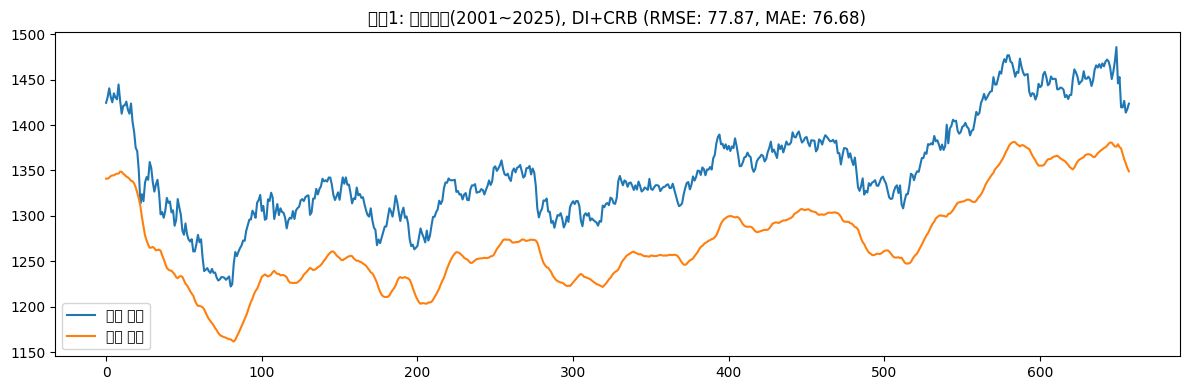

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
39/39 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 24ms/step - loss: 0.0658 - val_loss: 0.0402
Epoch 2/50
39/39 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 14ms/step - loss: 0.0160 - val_loss: 0.0670
Epoch 3/50
39/39 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 9ms/step - loss: 0.0137 - val_loss: 0.0680
Epoch 4/50
39/39 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 9ms/step - loss: 0.0134 - val_loss: 0.0544
Epoch 5/50
39/39 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 9ms/step - loss: 0.0111 - val_loss: 0.0645
Epoch 6/50
39/39 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step - loss: 0.0091 - val_loss: 0.0839
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 52ms/step


<ipython-input-2-a4d2c915b9cd>:64: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-a4d2c915b9cd>:64: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-a4d2c915b9cd>:64: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-a4d2c915b9cd>:64: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-a4d2c915b9cd>:64: UserWarning: Glyph 54980 (\N{HANGUL SYLLABLE HU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-a4d2c915b9cd>:64: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-a4d2c915b9cd>:64: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2

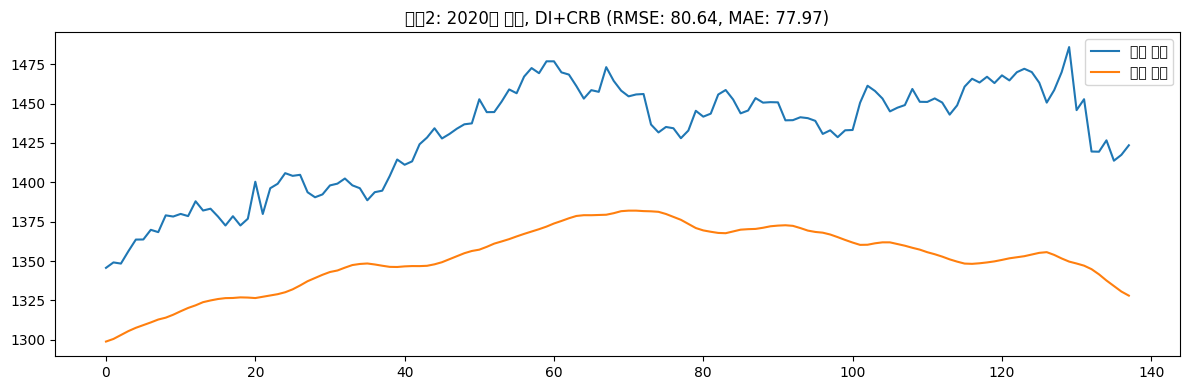

                          Model       RMSE        MAE
0  Î™®Îç∏1: Ï†ÑÏ≤¥Í∏∞Í∞Ñ(2001~2025), DI+CRB  77.874131  76.676875
1         Î™®Îç∏2: 2020ÎÖÑ Ïù¥ÌõÑ, DI+CRB  80.641687  77.971070


In [ ]:
# Í≥µÌÜµ ÏÑ§Ï†ï
features = ['USD/KRW', 'Dollar_Index', 'CRB']
seq_len = 10

def create_sequences(data, seq_len=10): #ÏûÖÎ†• ÏãúÌÄÄÏä§ 10Ïùº
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i])
        y.append(data[i, 0])  # ÌÉÄÍ≤ü: USD/KRW
    return np.array(X), np.array(y)

def train_and_evaluate(df_input, model_label):
    df_model = df_input[features].dropna()
    scaler = MinMaxScaler() #Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî MinMaxScaler
    scaled = scaler.fit_transform(df_model)

    X, y = create_sequences(scaled, seq_len)
    split_idx = int(len(X) * 0.9) #ÌïôÏäµ 90 Í≤ÄÏ¶ù 10
    X_train, X_val = X[:split_idx], X[split_idx:]
    y_train, y_val = y[:split_idx], y[split_idx:]

    model = Sequential([
        LSTM(64, dropout=0.2, input_shape=(X.shape[1], X.shape[2])),
        Dense(1)
    ])
    model.compile(loss='mse', optimizer='adam')
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    model.fit(X_train, y_train, validation_data=(X_val, y_val),
              epochs=50, batch_size=32, callbacks=[early_stop], verbose=1)

    pred_scaled = model.predict(X_val)
    usd_idx = features.index('USD/KRW')

    y_val_rescaled = scaler.inverse_transform(
        np.concatenate([y_val.reshape(-1, 1), np.zeros((len(y_val), len(features)-1))], axis=1)
    )[:, usd_idx]

    pred_rescaled = scaler.inverse_transform(
        np.concatenate([pred_scaled, np.zeros((len(pred_scaled), len(features)-1))], axis=1)
    )[:, usd_idx]

    rmse = np.sqrt(mean_squared_error(y_val_rescaled, pred_rescaled))
    mae = mean_absolute_error(y_val_rescaled, pred_rescaled)

    plt.figure(figsize=(12, 4))
    plt.plot(y_val_rescaled, label='Ïã§Ï†ú ÌôòÏú®')
    plt.plot(pred_rescaled, label='ÏòàÏ∏° ÌôòÏú®')
    plt.title(f'{model_label} (RMSE: {rmse:.2f}, MAE: {mae:.2f})')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return {'Model': model_label, 'RMSE': rmse, 'MAE': mae}

# Î™®Îç∏ 1: Ï†ÑÏ≤¥ Í∏∞Í∞Ñ (2001~2025)
results1 = train_and_evaluate(df.copy(), 'Î™®Îç∏1: Ï†ÑÏ≤¥Í∏∞Í∞Ñ(2001~2025), DI+CRB')

# Î™®Îç∏ 2: 2020ÎÖÑ Ïù¥ÌõÑ
df_2020 = df[df['ÎÇ†Ïßú'] >= '2020-01-01'].copy()
results2 = train_and_evaluate(df_2020, 'Î™®Îç∏2: 2020ÎÖÑ Ïù¥ÌõÑ, DI+CRB')

# Í≤∞Í≥º ÎπÑÍµê
results_df = pd.DataFrame([results1, results2])
print(results_df)


##1-2 ÎèÖÎ¶ΩÎ≥ÄÏàò : Îã¨Îü¨ÏßÄÏàò
Í∏∞Í∞Ñ: Ï†ÑÏ≤¥ (2001~2025), ÏµúÍ∑º (2020Ïù¥ÌõÑ)

Íµ¨Ï°∞: 10Ïùº ÏãúÌÄÄÏä§Î°ú Îã§ÏùåÎÇ† ÏòàÏ∏°

Î∂ÑÌï†: ÌïôÏäµ 90% / Í≤ÄÏ¶ù 10%

ÌèâÍ∞Ä: RMSE, MAE

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


185/185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 9ms/step - loss: 0.0343 - val_loss: 0.0539
Epoch 2/50
185/185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 8ms/step - loss: 0.0096 - val_loss: 0.0141
Epoch 3/50
185/185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 7ms/step - loss: 0.0058 - val_loss: 0.0147
Epoch 4/50
185/185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 11ms/step - loss: 0.0046 - val_loss: 0.0140
Epoch 5/50
185/185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 9ms/step - loss: 0.0052 - val_loss: 0.0168
Epoch 6/50
185/185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 8ms/step - loss: 0.0046 - val_loss: 0.0202
Epoch 7/50
185/185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 7ms/step - loss: 0.0046 - val_loss: 0.0161
Epoch 8/50
185/185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 7ms/step - loss: 0.0045 - val_loss: 0.0217
Ep

21/21 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 18ms/step


<ipython-input-3-4905119ec6d2>:56: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-4905119ec6d2>:56: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-4905119ec6d2>:56: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-4905119ec6d2>:56: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-4905119ec6d2>:56: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-4905119ec6d2>:56: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-4905119ec6d2>:56: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3

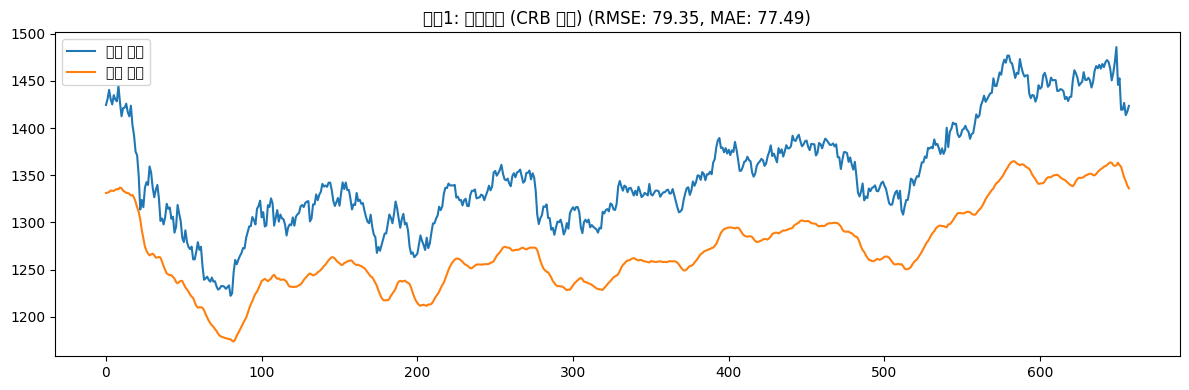

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 17ms/step - loss: 0.1026 - val_loss: 0.0577
Epoch 2/50
39/39 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 9ms/step - loss: 0.0196 - val_loss: 0.0500
Epoch 3/50
39/39 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 9ms/step - loss: 0.0131 - val_loss: 0.0639
Epoch 4/50
39/39 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 8ms/step - loss: 0.0122 - val_loss: 0.0545
Epoch 5/50
39/39 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 9ms/step - loss: 0.0102 - val_loss: 0.0404
Epoch 6/50
39/39 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 9ms/step - loss: 0.0104 - val_loss: 0.0295
Epoch 7/50
39/39 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 8ms/step - loss: 0.0089 - val_loss: 0.0300
Epoch 8/50
39/39 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 9ms/step - loss: 0.0071 - val_loss: 0.0343
Epoch 9/50
39/39 ‚

<ipython-input-3-4905119ec6d2>:56: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-4905119ec6d2>:56: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-4905119ec6d2>:56: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-4905119ec6d2>:56: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-4905119ec6d2>:56: UserWarning: Glyph 54980 (\N{HANGUL SYLLABLE HU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-4905119ec6d2>:56: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-4905119ec6d2>:56: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-

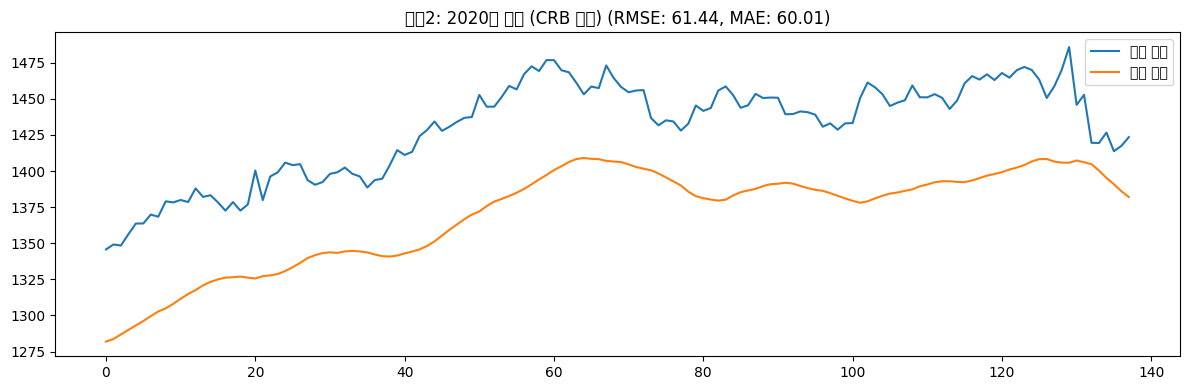

                    Model       RMSE        MAE
0      Î™®Îç∏1: Ï†ÑÏ≤¥Í∏∞Í∞Ñ (CRB Ï†úÏô∏)  79.348245  77.493026
1  Î™®Îç∏2: 2020ÎÖÑ Ïù¥ÌõÑ (CRB Ï†úÏô∏)  61.440574  60.007501


In [ ]:
# üí° CRB Ï†úÏô∏ ‚Üí ÏÇ¨Ïö©Ìï† ÎèÖÎ¶Ω Î≥ÄÏàò
features = ['USD/KRW', 'Dollar_Index']
seq_len = 10

# ‚õèÔ∏è ÏãúÌÄÄÏä§ ÏÉùÏÑ± Ìï®Ïàò
def create_sequences(data, seq_len=10):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i])
        y.append(data[i, 0])  # ÌÉÄÍ≤ü: USD/KRW
    return np.array(X), np.array(y)

# üß† Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä Ìï®Ïàò
def train_and_evaluate(df_input, model_label):
    df_model = df_input[features].dropna()
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df_model)

    X, y = create_sequences(scaled, seq_len)
    split_idx = int(len(X) * 0.9)
    X_train, X_val = X[:split_idx], X[split_idx:]
    y_train, y_val = y[:split_idx], y[split_idx:]

    model = Sequential([
        LSTM(64, dropout=0.2, input_shape=(X.shape[1], X.shape[2])),
        Dense(1)
    ])
    model.compile(loss='mse', optimizer='adam')
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    model.fit(X_train, y_train, validation_data=(X_val, y_val),
              epochs=50, batch_size=32, callbacks=[early_stop], verbose=1)

    pred_scaled = model.predict(X_val)
    usd_idx = features.index('USD/KRW')

    # Ïó≠Ï†ïÍ∑úÌôî
    y_val_rescaled = scaler.inverse_transform(
        np.concatenate([y_val.reshape(-1, 1), np.zeros((len(y_val), len(features)-1))], axis=1)
    )[:, usd_idx]

    pred_rescaled = scaler.inverse_transform(
        np.concatenate([pred_scaled, np.zeros((len(pred_scaled), len(features)-1))], axis=1)
    )[:, usd_idx]

    # üìä ÌèâÍ∞Ä
    rmse = np.sqrt(mean_squared_error(y_val_rescaled, pred_rescaled))
    mae = mean_absolute_error(y_val_rescaled, pred_rescaled)

    # üìà ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(12, 4))
    plt.plot(y_val_rescaled, label='Ïã§Ï†ú ÌôòÏú®')
    plt.plot(pred_rescaled, label='ÏòàÏ∏° ÌôòÏú®')
    plt.title(f'{model_label} (RMSE: {rmse:.2f}, MAE: {mae:.2f})')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return {'Model': model_label, 'RMSE': rmse, 'MAE': mae}

# ‚úÖ Ïã§Ìóò 1: Ï†ÑÏ≤¥ Í∏∞Í∞Ñ
results1 = train_and_evaluate(df.copy(), 'Î™®Îç∏1: Ï†ÑÏ≤¥Í∏∞Í∞Ñ (CRB Ï†úÏô∏)')

# ‚úÖ Ïã§Ìóò 2: 2020ÎÖÑ Ïù¥ÌõÑ
df_recent = df[df['ÎÇ†Ïßú'] >= '2020-01-01'].copy()
results2 = train_and_evaluate(df_recent, 'Î™®Îç∏2: 2020ÎÖÑ Ïù¥ÌõÑ (CRB Ï†úÏô∏)')

# üìã Í≤∞Í≥º ÎπÑÍµê
results_df = pd.DataFrame([results1, results2])
print(results_df)


##1-3 ÎèÖÎ¶ΩÎ≥ÄÏàò : Îã¨Îü¨ÏßÄÏàò, CRB, VIX
Í∏∞Í∞Ñ: Ï†ÑÏ≤¥ (2001~2025), ÏµúÍ∑º (2020Ïù¥ÌõÑ)

Íµ¨Ï°∞: 10Ïùº ÏãúÌÄÄÏä§Î°ú Îã§ÏùåÎÇ† ÏòàÏ∏°

Î∂ÑÌï†: ÌïôÏäµ 90% / Í≤ÄÏ¶ù 10%

ÌèâÍ∞Ä: RMSE, MAE

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
185/185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 9ms/step - loss: 0.0122 - val_loss: 0.0152
Epoch 2/50
185/185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 9ms/step - loss: 0.0056 - val_loss: 0.0141
Epoch 3/50
185/185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 9ms/step - loss: 0.0045 - val_loss: 0.0184
Epoch 4/50
185/185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 8ms/step - loss: 0.0034 - val_loss: 0.0173
Epoch 5/50
185/185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 12ms/step - loss: 0.0035 - val_loss: 0.0240
Epoch 6/50
185/185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 9ms/step - loss: 0.0028 - val_loss: 0.0214
Epoch 7/50
185/185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 8ms/step - loss: 0.0030 - val_loss: 0.0207
21/21 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 14ms/step


<ipython-input-6-23237e645d28>:57: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-23237e645d28>:57: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-23237e645d28>:57: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-23237e645d28>:57: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-23237e645d28>:57: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-23237e645d28>:57: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-23237e645d28>:57: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6

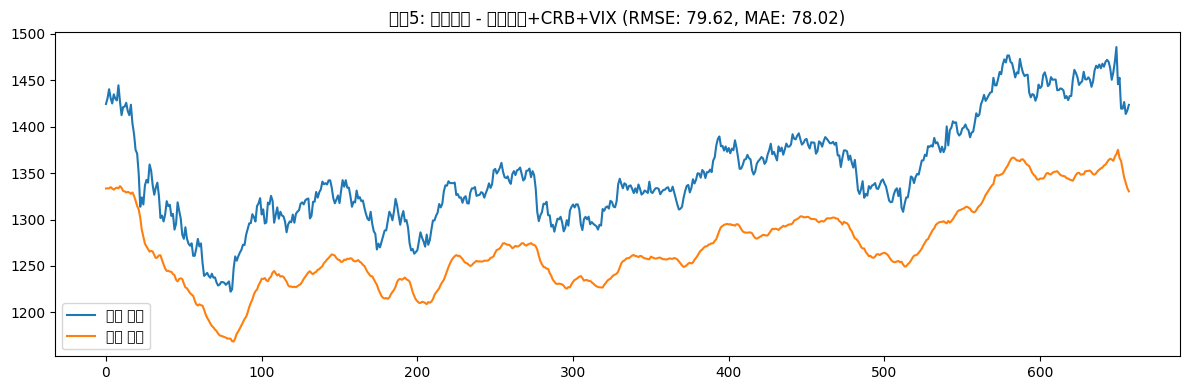

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 18ms/step - loss: 0.0844 - val_loss: 0.0406
Epoch 2/50
39/39 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 10ms/step - loss: 0.0196 - val_loss: 0.0546
Epoch 3/50
39/39 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 10ms/step - loss: 0.0153 - val_loss: 0.0468
Epoch 4/50
39/39 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 11ms/step - loss: 0.0115 - val_loss: 0.0714
Epoch 5/50
39/39 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 9ms/step - loss: 0.0109 - val_loss: 0.0764
Epoch 6/50
39/39 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 16ms/step - loss: 0.0085 - val_loss: 0.0451
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 97ms/step


<ipython-input-6-23237e645d28>:57: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-23237e645d28>:57: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-23237e645d28>:57: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-23237e645d28>:57: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-23237e645d28>:57: UserWarning: Glyph 54980 (\N{HANGUL SYLLABLE HU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-23237e645d28>:57: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-23237e645d28>:57: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-

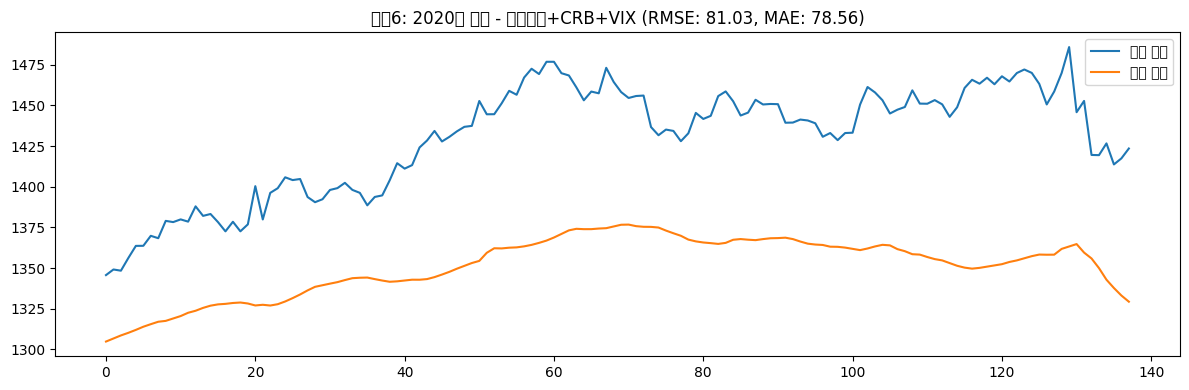

                          Model       RMSE        MAE
0      Î™®Îç∏5: Ï†ÑÏ≤¥Í∏∞Í∞Ñ - Ï£ºÍ∞ÄÏßÄÏàò+CRB+VIX  79.616671  78.019503
1  Î™®Îç∏6: 2020ÎÖÑ Ïù¥ÌõÑ - Ï£ºÍ∞ÄÏßÄÏàò+CRB+VIX  81.031472  78.555128


In [ ]:
# Ï£ºÍ∞ÄÏßÄÏàò + CRB + VIX Ìè¨Ìï®
features = ['USD/KRW', 'Dollar_Index', 'CRB', 'VIX']
seq_len = 10

def create_sequences(data, seq_len=10):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i])
        y.append(data[i, 0])  # Ï≤´ Î≤àÏß∏ Ïó¥ÏùÄ Ìï≠ÏÉÅ ÌÉÄÍ≤ü (USD/KRW)
    return np.array(X), np.array(y)

def train_and_evaluate(df_input, model_label):
    df_model = df_input[features].dropna()
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df_model)

    X, y = create_sequences(scaled, seq_len)
    split_idx = int(len(X) * 0.9)
    X_train, X_val = X[:split_idx], X[split_idx:]
    y_train, y_val = y[:split_idx], y[split_idx:]

    model = Sequential([
        LSTM(64, dropout=0.2, input_shape=(X.shape[1], X.shape[2])),
        Dense(1)
    ])
    model.compile(loss='mse', optimizer='adam')
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    model.fit(X_train, y_train,
              validation_data=(X_val, y_val),
              epochs=50,
              batch_size=32,
              callbacks=[early_stop],
              verbose=1)

    # ÏòàÏ∏°
    pred_scaled = model.predict(X_val)
    usd_idx = features.index('USD/KRW')

    y_val_rescaled = scaler.inverse_transform(
        np.concatenate([y_val.reshape(-1, 1), np.zeros((len(y_val), len(features)-1))], axis=1)
    )[:, usd_idx]

    pred_rescaled = scaler.inverse_transform(
        np.concatenate([pred_scaled, np.zeros((len(pred_scaled), len(features)-1))], axis=1)
    )[:, usd_idx]

    rmse = np.sqrt(mean_squared_error(y_val_rescaled, pred_rescaled))
    mae = mean_absolute_error(y_val_rescaled, pred_rescaled)

    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(12, 4))
    plt.plot(y_val_rescaled, label='Ïã§Ï†ú ÌôòÏú®')
    plt.plot(pred_rescaled, label='ÏòàÏ∏° ÌôòÏú®')
    plt.title(f'{model_label} (RMSE: {rmse:.2f}, MAE: {mae:.2f})')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return {'Model': model_label, 'RMSE': rmse, 'MAE': mae}

# ‚úÖ Ïã§Ìóò 1: Ï†ÑÏ≤¥Í∏∞Í∞Ñ
results_all = train_and_evaluate(df.copy(), 'Î™®Îç∏5: Ï†ÑÏ≤¥Í∏∞Í∞Ñ - Ï£ºÍ∞ÄÏßÄÏàò+CRB+VIX')

# ‚úÖ Ïã§Ìóò 2: 2020ÎÖÑ Ïù¥ÌõÑ
df_recent = df[df['ÎÇ†Ïßú'] >= '2020-01-01'].copy()
results_recent = train_and_evaluate(df_recent, 'Î™®Îç∏6: 2020ÎÖÑ Ïù¥ÌõÑ - Ï£ºÍ∞ÄÏßÄÏàò+CRB+VIX')

# Í≤∞Í≥º Ï†ïÎ¶¨
results_df = pd.DataFrame([results_all, results_recent])
print(results_df)


##1-4 ÎèÖÎ¶ΩÎ≥ÄÏàò : Îã¨Îü¨ÏßÄÏàò, CRB, VIX, ÏΩîÏä§Ìîº, ÎÇòÏä§Îã•, S&P500, WTI, Í∏à, US10Y
Í∏∞Í∞Ñ: Ï†ÑÏ≤¥ (2001~2025), ÏµúÍ∑º (2020Ïù¥ÌõÑ)

Íµ¨Ï°∞: 10Ïùº ÏãúÌÄÄÏä§Î°ú Îã§ÏùåÎÇ† ÏòàÏ∏°

Î∂ÑÌï†: ÌïôÏäµ 90% / Í≤ÄÏ¶ù 10%

ÌèâÍ∞Ä: RMSE, MAE

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


185/185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 14ms/step - loss: 0.0181 - val_loss: 0.0557
Epoch 2/50
185/185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 8ms/step - loss: 0.0081 - val_loss: 0.0401
Epoch 3/50
185/185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 8ms/step - loss: 0.0055 - val_loss: 0.0101
Epoch 4/50
185/185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 8ms/step - loss: 0.0039 - val_loss: 0.0111
Epoch 5/50
185/185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 8ms/step - loss: 0.0032 - val_loss: 0.0070
Epoch 6/50
185/185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - loss: 0.0028 - val_loss: 0.0172
Epoch 7/50
185/185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 8ms/step - loss: 0.0027 - val_loss: 0.0171
Epoch 8/50
185/185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 8ms/step - loss: 0.0030 - val_loss: 0.0179
E

<ipython-input-9-02ca21a67f86>:58: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9-02ca21a67f86>:58: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9-02ca21a67f86>:58: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9-02ca21a67f86>:58: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9-02ca21a67f86>:58: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9-02ca21a67f86>:58: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9-02ca21a67f86>:58: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-

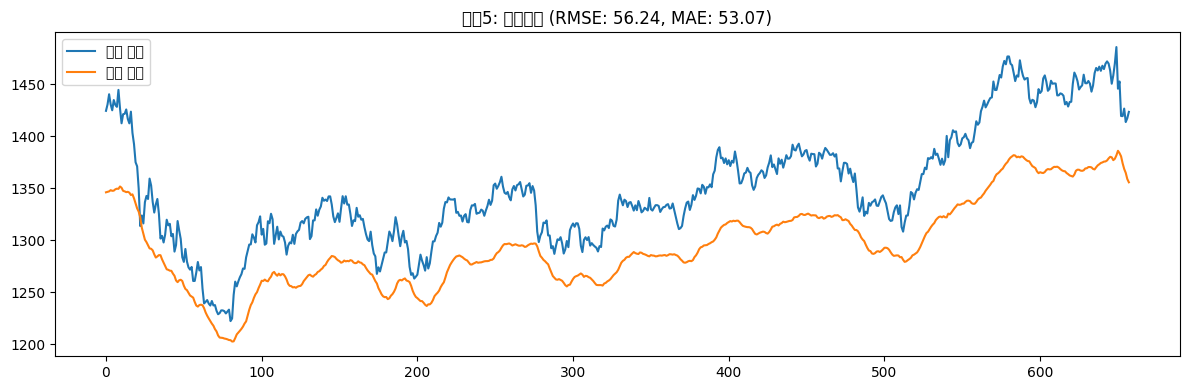

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
39/39 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 25ms/step - loss: 0.1384 - val_loss: 0.0094
Epoch 2/50
39/39 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 12ms/step - loss: 0.0143 - val_loss: 0.0304
Epoch 3/50
39/39 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 9ms/step - loss: 0.0147 - val_loss: 0.0339
Epoch 4/50
39/39 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 9ms/step - loss: 0.0131 - val_loss: 0.0247
Epoch 5/50
39/39 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 10ms/step - loss: 0.0121 - val_loss: 0.0256
Epoch 6/50
39/39 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 10ms/step - loss: 0.0100 - val_loss: 0.0415
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 54ms/step


<ipython-input-9-02ca21a67f86>:58: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9-02ca21a67f86>:58: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9-02ca21a67f86>:58: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9-02ca21a67f86>:58: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9-02ca21a67f86>:58: UserWarning: Glyph 54980 (\N{HANGUL SYLLABLE HU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9-02ca21a67f86>:58: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9-02ca21a67f86>:58: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9

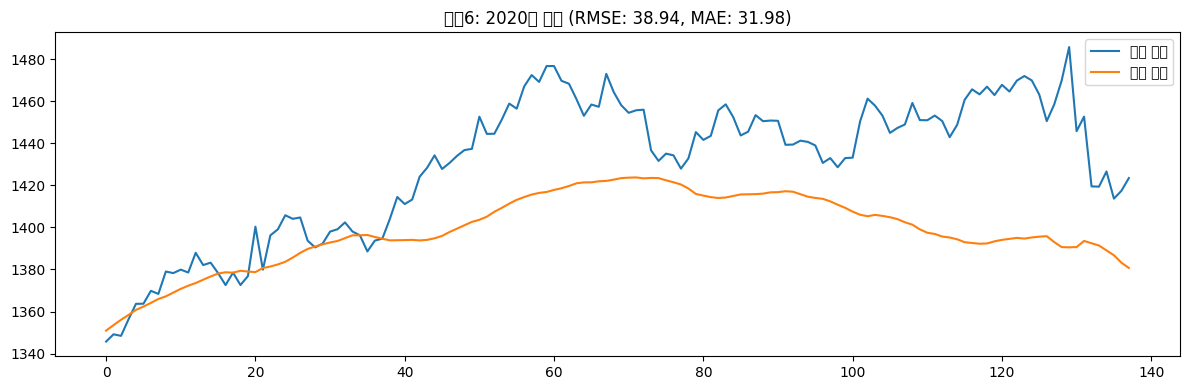

           Model       RMSE        MAE
0      Î™®Îç∏5: Ï†ÑÏ≤¥Í∏∞Í∞Ñ  56.239044  53.068834
1  Î™®Îç∏6: 2020ÎÖÑ Ïù¥ÌõÑ  38.940051  31.976831


In [ ]:
features = [
    'USD/KRW', 'Dollar_Index', 'CRB', 'VIX',
    'KOSPI', 'NASDAQ', 'S&P500', 'WTI', 'Gold', 'US10Y'
]

def create_sequences(data, seq_len=10):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i])
        y.append(data[i, 0])  # Ï≤´ Î≤àÏß∏ Ïó¥ÏùÄ Ìï≠ÏÉÅ ÌÉÄÍ≤ü (USD/KRW)
    return np.array(X), np.array(y)

def train_and_evaluate(df_input, model_label):
    df_model = df_input[features].dropna()
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df_model)

    X, y = create_sequences(scaled, seq_len)
    split_idx = int(len(X) * 0.9)
    X_train, X_val = X[:split_idx], X[split_idx:]
    y_train, y_val = y[:split_idx], y[split_idx:]

    model = Sequential([
        LSTM(64, dropout=0.2, input_shape=(X.shape[1], X.shape[2])),
        Dense(1)
    ])
    model.compile(loss='mse', optimizer='adam')
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    model.fit(X_train, y_train,
              validation_data=(X_val, y_val),
              epochs=50,
              batch_size=32,
              callbacks=[early_stop],
              verbose=1)

    # ÏòàÏ∏°
    pred_scaled = model.predict(X_val)
    usd_idx = features.index('USD/KRW')

    y_val_rescaled = scaler.inverse_transform(
        np.concatenate([y_val.reshape(-1, 1), np.zeros((len(y_val), len(features)-1))], axis=1)
    )[:, usd_idx]

    pred_rescaled = scaler.inverse_transform(
        np.concatenate([pred_scaled, np.zeros((len(pred_scaled), len(features)-1))], axis=1)
    )[:, usd_idx]

    rmse = np.sqrt(mean_squared_error(y_val_rescaled, pred_rescaled))
    mae = mean_absolute_error(y_val_rescaled, pred_rescaled)

    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(12, 4))
    plt.plot(y_val_rescaled, label='Ïã§Ï†ú ÌôòÏú®')
    plt.plot(pred_rescaled, label='ÏòàÏ∏° ÌôòÏú®')
    plt.title(f'{model_label} (RMSE: {rmse:.2f}, MAE: {mae:.2f})')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return {'Model': model_label, 'RMSE': rmse, 'MAE': mae}

# ‚úÖ Ïã§Ìóò 1: Ï†ÑÏ≤¥Í∏∞Í∞Ñ
results_all = train_and_evaluate(df.copy(), 'Î™®Îç∏5: Ï†ÑÏ≤¥Í∏∞Í∞Ñ')

# ‚úÖ Ïã§Ìóò 2: 2020ÎÖÑ Ïù¥ÌõÑ
df_recent = df[df['ÎÇ†Ïßú'] >= '2020-01-01'].copy()
results_recent = train_and_evaluate(df_recent, 'Î™®Îç∏6: 2020ÎÖÑ Ïù¥ÌõÑ')

# Í≤∞Í≥º Ï†ïÎ¶¨
results_df = pd.DataFrame([results_all, results_recent])
print(results_df)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


185/185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 12ms/step - loss: 0.0205 - val_loss: 0.0370
Epoch 2/50
185/185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 7ms/step - loss: 0.0081 - val_loss: 0.0226
Epoch 3/50
185/185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 7ms/step - loss: 0.0057 - val_loss: 0.0144
Epoch 4/50
185/185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 7ms/step - loss: 0.0044 - val_loss: 0.0127
Epoch 5/50
185/185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 8ms/step - loss: 0.0032 - val_loss: 0.0161
Epoch 6/50
185/185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - loss: 0.0027 - val_loss: 0.0204
Epoch 7/50
185/185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 8ms/step - loss: 0.0030 - val_loss: 0.0180
Epoch 8/50
185/185 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 7ms/step - loss: 0.0026 - val_loss: 0.0142
E

<ipython-input-8-327198abb86c>:73: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-327198abb86c>:73: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-327198abb86c>:73: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-327198abb86c>:73: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-327198abb86c>:73: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-327198abb86c>:73: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-327198abb86c>:73: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-

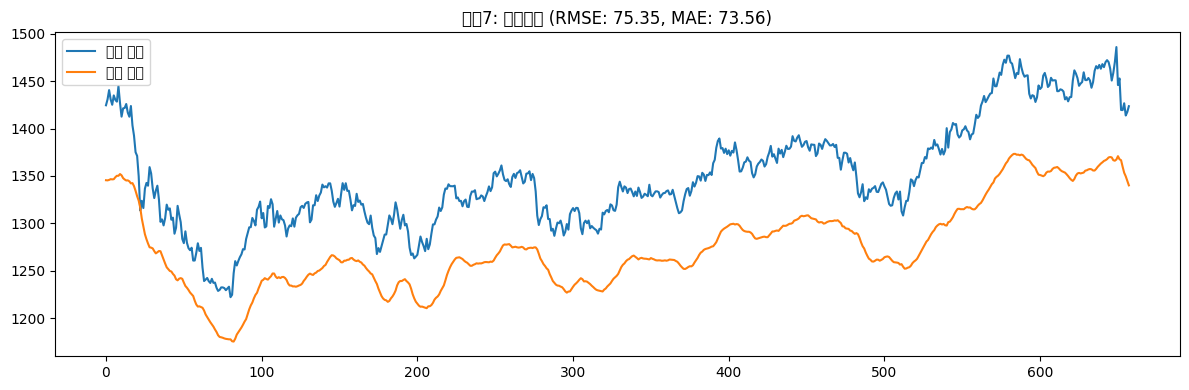

21/21 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step 
21/21 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step
21/21 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step
21/21 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step 
21/21 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step
21/21 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step
21/21 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step
21/21 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step
21/21 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step 
21/21 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step
21/21 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 25ms/step - loss: 0.0594 - val_loss: 0.0418
Epoch 2/50
39/39 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 9ms/step - loss: 0.0134 - val_loss: 0.0279
Epoch 3/50
39/39 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 9ms/step - loss: 0.0121 - val_loss: 0.0341
Epoch 4/50
39/39 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 9ms/step - loss: 0.0105 - val_loss: 0.0365
Epoch 5/50
39/39 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 9ms/step - loss: 0.0092 - val_loss: 0.0447
Epoch 6/50
39/39 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 9ms/step - loss: 0.0080 - val_loss: 0.0569
Epoch 7/50
39/39 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 9ms/step - loss: 0.0068 - val_loss: 0.0389
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 56ms/step


<ipython-input-8-327198abb86c>:73: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-327198abb86c>:73: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-327198abb86c>:73: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-327198abb86c>:73: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-327198abb86c>:73: UserWarning: Glyph 54980 (\N{HANGUL SYLLABLE HU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-327198abb86c>:73: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-327198abb86c>:73: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8

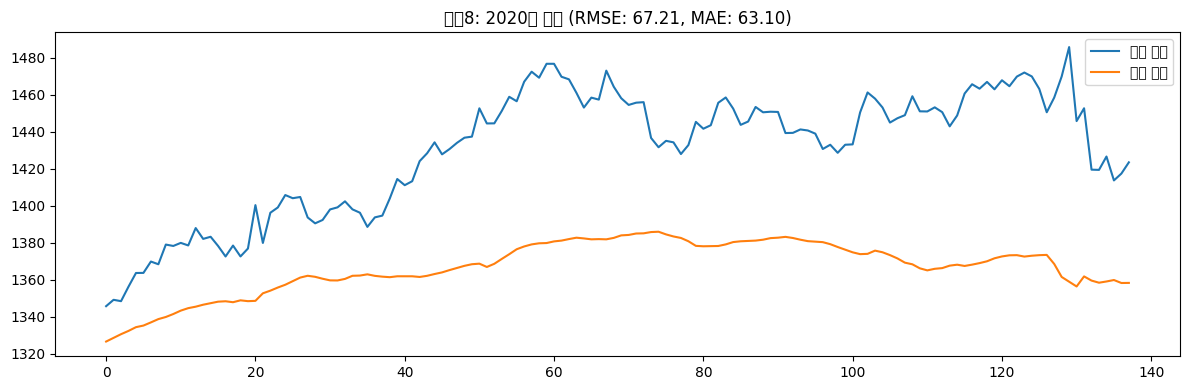

5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step 
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step 
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step 
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step 
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step 
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step 
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step 
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step 
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step 
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step 
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step 


<ipython-input-8-327198abb86c>:117: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-327198abb86c>:117: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


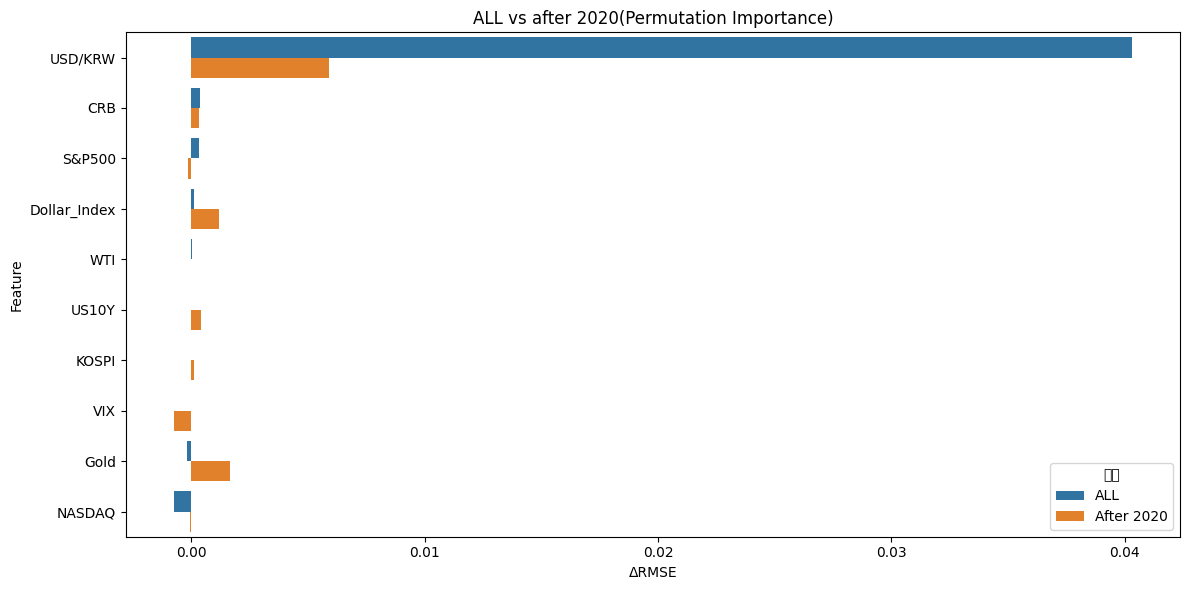

Feature     ŒîRMSE          Í∏∞Í∞Ñ
0       USD/KRW  0.040314         ALL
2           CRB  0.000363         ALL
6        S&P500  0.000330         ALL
1  Dollar_Index  0.000114         ALL
7           WTI  0.000026         ALL
9         US10Y -0.000005         ALL
4         KOSPI -0.000006         ALL
3           VIX -0.000027         ALL
8          Gold -0.000164         ALL
5        NASDAQ -0.000752         ALL
0       USD/KRW  0.005912  After 2020
8          Gold  0.001666  After 2020
1  Dollar_Index  0.001185  After 2020
9         US10Y  0.000431  After 2020
2           CRB  0.000313  After 2020
4         KOSPI  0.000134  After 2020
7           WTI  0.000009  After 2020
5        NASDAQ -0.000056  After 2020
6        S&P500 -0.000133  After 2020
3           VIX -0.000733  After 2020

In [ ]:
# Í∏∞Î≥∏ ÎùºÏù¥Î∏åÎü¨Î¶¨
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

#Î≥ÄÏàò ÏÑ§Ï†ï
features = [
    'USD/KRW', 'Dollar_Index', 'CRB', 'VIX',
    'KOSPI', 'NASDAQ', 'S&P500', 'WTI', 'Gold', 'US10Y'
]
seq_len = 10

#ÏãúÌÄÄÏä§ ÏÉùÏÑ±
def create_sequences(data, seq_len=10):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

#LSTM Î™®Îç∏ ÌïôÏäµ
def train_and_evaluate(df_input, model_label, return_model=False):
    df_model = df_input[features].dropna()
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df_model)

    X, y = create_sequences(scaled, seq_len)
    split_idx = int(len(X) * 0.9)
    X_train, X_val = X[:split_idx], X[split_idx:]
    y_train, y_val = y[:split_idx], y[split_idx:]

    model = Sequential([
        LSTM(64, dropout=0.2, input_shape=(X.shape[1], X.shape[2])),
        Dense(1)
    ])
    model.compile(loss='mse', optimizer='adam')
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    model.fit(X_train, y_train,
              validation_data=(X_val, y_val),
              epochs=50,
              batch_size=32,
              callbacks=[early_stop],
              verbose=1)

    pred_scaled = model.predict(X_val)
    usd_idx = features.index('USD/KRW')

    y_val_rescaled = scaler.inverse_transform(
        np.concatenate([y_val.reshape(-1, 1), np.zeros((len(y_val), len(features)-1))], axis=1)
    )[:, usd_idx]
    pred_rescaled = scaler.inverse_transform(
        np.concatenate([pred_scaled, np.zeros((len(pred_scaled), len(features)-1))], axis=1)
    )[:, usd_idx]

    rmse = np.sqrt(mean_squared_error(y_val_rescaled, pred_rescaled))
    mae = mean_absolute_error(y_val_rescaled, pred_rescaled)

    plt.figure(figsize=(12, 4))
    plt.plot(y_val_rescaled, label='Ïã§Ï†ú ÌôòÏú®')
    plt.plot(pred_rescaled, label='ÏòàÏ∏° ÌôòÏú®')
    plt.title(f'{model_label} (RMSE: {rmse:.2f}, MAE: {mae:.2f})')
    plt.legend()
    plt.tight_layout()
    plt.show()

    result = {'Model': model_label, 'RMSE': rmse, 'MAE': mae}
    if return_model:
        return result, model, X_val, y_val
    else:
        return result

#Permutation Importance
def permutation_importance(model, X_val, y_val, features, baseline_rmse):
    importances = []
    for i in range(X_val.shape[2]):
        X_temp = copy.deepcopy(X_val)
        np.random.shuffle(X_temp[:, :, i])
        pred = model.predict(X_temp)
        rmse = np.sqrt(mean_squared_error(y_val, pred))
        delta = rmse - baseline_rmse
        importances.append(delta)
    return pd.DataFrame({'Feature': features, 'ŒîRMSE': importances}).sort_values(by='ŒîRMSE', ascending=False)

#Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("Î≥ëÌï©ver3.csv")
df['ÎÇ†Ïßú'] = pd.to_datetime(df['ÎÇ†Ïßú'])

#Ï†ÑÏ≤¥Í∏∞Í∞Ñ
results_all, model_all, X_val_all, y_val_all = train_and_evaluate(df.copy(), 'Î™®Îç∏7: Ï†ÑÏ≤¥Í∏∞Í∞Ñ', return_model=True)
baseline_rmse_all = np.sqrt(mean_squared_error(y_val_all, model_all.predict(X_val_all)))
importance_df_all = permutation_importance(model_all, X_val_all, y_val_all, features, baseline_rmse_all)
importance_df_all['Í∏∞Í∞Ñ'] = 'ALL'

#2020ÎÖÑ Ïù¥ÌõÑ
df_recent = df[df['ÎÇ†Ïßú'] >= '2020-01-01'].copy()
results_recent, model_recent, X_val_recent, y_val_recent = train_and_evaluate(df_recent, 'Î™®Îç∏8: 2020ÎÖÑ Ïù¥ÌõÑ', return_model=True)
baseline_rmse_recent = np.sqrt(mean_squared_error(y_val_recent, model_recent.predict(X_val_recent)))
importance_df_recent = permutation_importance(model_recent, X_val_recent, y_val_recent, features, baseline_rmse_recent)
importance_df_recent['Í∏∞Í∞Ñ'] = 'After 2020'

#Îëê Í≤∞Í≥º Í≤∞Ìï© Î∞è ÏãúÍ∞ÅÌôî
importance_combined = pd.concat([importance_df_all, importance_df_recent])

plt.figure(figsize=(12, 6))
sns.barplot(data=importance_combined, x='ŒîRMSE', y='Feature', hue='Í∏∞Í∞Ñ')
plt.title('ALL vs after 2020(Permutation Importance)')
plt.tight_layout()
plt.show()

#Í≤∞Í≥º Ï∂úÎ†•
importance_combined


##1-5 ÎèÖÎ¶ΩÎ≥ÄÏàò : ÎπÑÌä∏ÏΩîÏù∏ Ï†úÏô∏ Ï†ÑÏ≤¥(ÌïôÏäµÎç∞Ïù¥ÌÑ∞ Í∏∞Í∞Ñ Ï°∞Ï†ï)
Í∏∞Í∞Ñ: (2000-01-01", "2009-12-31)(2010-01-01", "2019-12-31)(2020-01-01", "2021-12-31)(2022-01-01", "2023-12-31)

Íµ¨Ï°∞: 10Ïùº ÏãúÌÄÄÏä§Î°ú Îã§ÏùåÎÇ† ÏòàÏ∏°

Î∂ÑÌï†: ÌïôÏäµ 90% / Í≤ÄÏ¶ù 10%

ÌèâÍ∞Ä: RMSE, MAE

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
73/73 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 13ms/step - loss: 0.0472 - val_loss: 0.0310
Epoch 2/50
73/73 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 8ms/step - loss: 0.0094 - val_loss: 0.0221
Epoch 3/50
73/73 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 8ms/step - loss: 0.0072 - val_loss: 0.0259
Epoch 4/50
73/73 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 8ms/step - loss: 0.0067 - val_loss: 0.0226
Epoch 5/50
73/73 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 8ms/step - loss: 0.0061 - val_loss: 0.0169
Epoch 6/50
73/73 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 8ms/step - loss: 0.0062 - val_loss: 0.0178
Epoch 7/50
73/73 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 8ms/step - loss: 0.0054 - val_loss: 0.0209
Epoch 8/50
73/73 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 8ms/step - loss: 0.0049 - val_loss: 0.0229
Epoch 9

<ipython-input-4-603e49d93ddf>:59: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-603e49d93ddf>:59: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-603e49d93ddf>:59: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-603e49d93ddf>:59: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-603e49d93ddf>:59: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-603e49d93ddf>:59: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu San

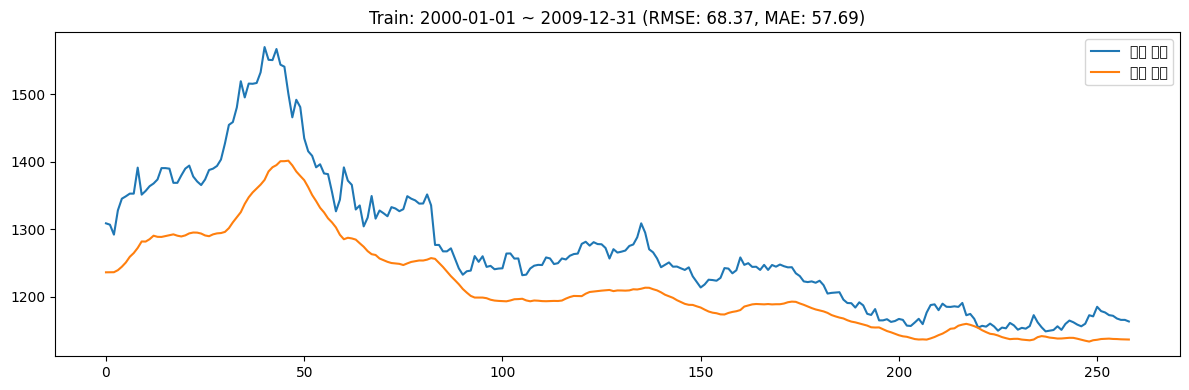

8/8 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step 
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


74/74 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 12ms/step - loss: 0.0652 - val_loss: 0.0238
Epoch 2/50
74/74 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 8ms/step - loss: 0.0189 - val_loss: 0.0234
Epoch 3/50
74/74 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 8ms/step - loss: 0.0153 - val_loss: 0.0318
Epoch 4/50
74/74 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 8ms/step - loss: 0.0150 - val_loss: 0.0391
Epoch 5/50
74/74 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 8ms/step - loss: 0.0125 - val_loss: 0.0257
Epoch 6/50
74/74 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 8ms/step - loss: 0.0103 - val_loss: 0.0283
Epoch 7/50
74/74 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 8ms/step - loss: 0.0077 - val_loss: 0.0331
9/9 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 28ms/step


<ipython-input-4-603e49d93ddf>:59: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-603e49d93ddf>:59: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-603e49d93ddf>:59: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-603e49d93ddf>:59: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-603e49d93ddf>:59: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-603e49d93ddf>:59: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu San

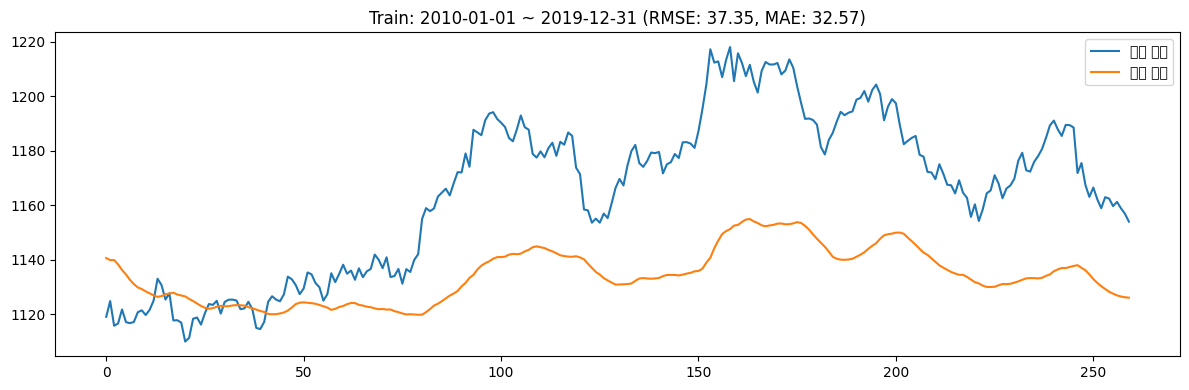

8/8 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 6ms/step 
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 35ms/step - loss: 0.1273 - val_loss: 0.0013
Epoch 2/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 14ms/step - loss: 0.0290 - val_loss: 0.0032
Epoch 3/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - loss: 0.0219 - val_loss: 0.0138
Epoch 4/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 12ms/step - loss: 0.0206 - val_loss: 0.0091
Epoch 5/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - loss: 0.0175 - val_loss: 0.0064
Epoch 6/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - loss: 0.0164 - val_loss: 0.0100
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 212ms/step


<ipython-input-4-603e49d93ddf>:59: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-603e49d93ddf>:59: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-603e49d93ddf>:59: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-603e49d93ddf>:59: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-603e49d93ddf>:59: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-603e49d93ddf>:59: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu San

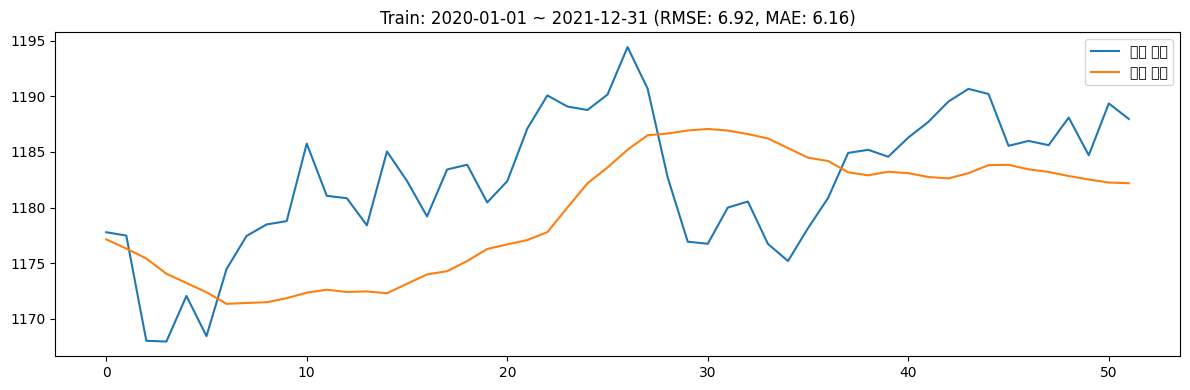

8/8 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step 
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 36ms/step - loss: 0.0863 - val_loss: 0.0027
Epoch 2/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 12ms/step - loss: 0.0293 - val_loss: 0.0073
Epoch 3/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - loss: 0.0203 - val_loss: 0.0024
Epoch 4/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 15ms/step - loss: 0.0171 - val_loss: 0.0022
Epoch 5/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 12ms/step - loss: 0.0199 - val_loss: 0.0034
Epoch 6/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 13ms/step - loss: 0.0205 - val_loss: 0.0023
Epoch 7/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 14ms/step - loss: 0.0167 - val_loss: 0.0024
Epoch 8/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 14ms/step - loss: 0.0162 - val_loss: 0.0023
Epoch 9/50


<ipython-input-4-603e49d93ddf>:59: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-603e49d93ddf>:59: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-603e49d93ddf>:59: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-603e49d93ddf>:59: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-603e49d93ddf>:59: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-603e49d93ddf>:59: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu San

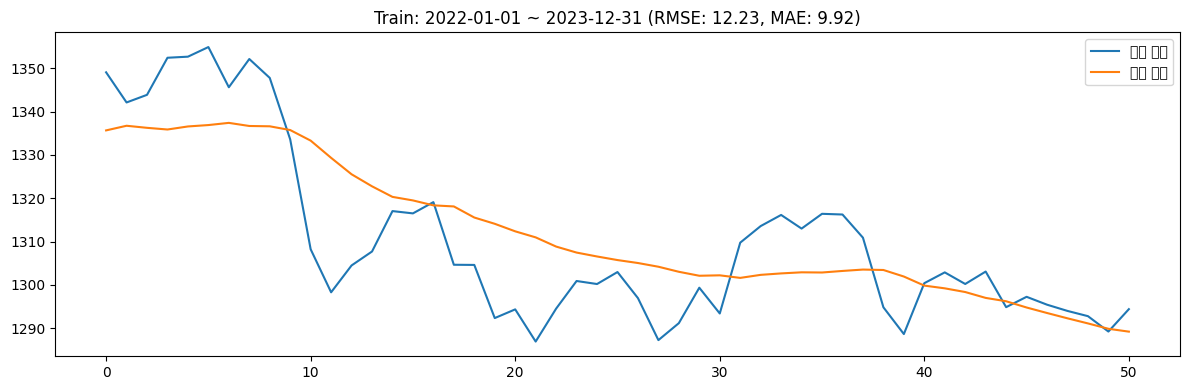

8/8 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step 


<ipython-input-4-603e49d93ddf>:118: UserWarning: Glyph 54984 (\N{HANGUL SYLLABLE HUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-603e49d93ddf>:118: UserWarning: Glyph 47144 (\N{HANGUL SYLLABLE RYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-603e49d93ddf>:118: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-603e49d93ddf>:118: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-603e49d93ddf>:118: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-603e49d93ddf>:118: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-603e49d93ddf>:118: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipy

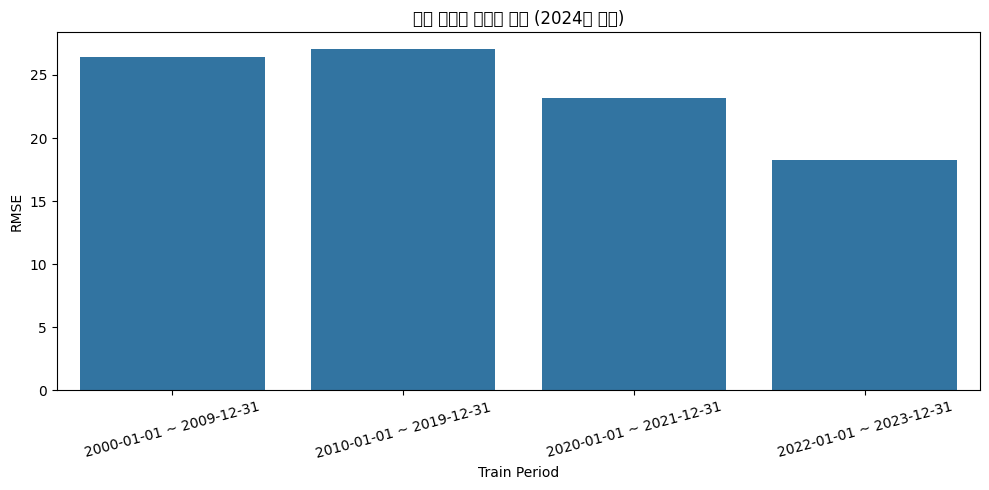

              Train Period              Test Period       RMSE        MAE
0  2000-01-01 ~ 2009-12-31  2024-01-01 ~ 2024-12-31  26.425425  20.681485
1  2010-01-01 ~ 2019-12-31  2024-01-01 ~ 2024-12-31  27.025007  21.494682
2  2020-01-01 ~ 2021-12-31  2024-01-01 ~ 2024-12-31  23.152942  18.714627
3  2022-01-01 ~ 2023-12-31  2024-01-01 ~ 2024-12-31  18.261824  14.407630


In [ ]:
import seaborn as sns
import copy

#Î≥ÄÏàò ÏÑ§Ï†ï
features = [
    'USD/KRW', 'Dollar_Index', 'CRB', 'VIX',
    'KOSPI', 'NASDAQ', 'S&P500', 'WTI', 'Gold', 'US10Y'
]
seq_len = 10

#ÏãúÌÄÄÏä§ ÏÉùÏÑ± Ìï®Ïàò
def create_sequences(data, seq_len=10):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

#Î™®Îç∏ ÌïôÏäµ Ìï®Ïàò
def train_and_evaluate(df_input, model_label, return_model=False):
    df_model = df_input[features].dropna()
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df_model)

    X, y = create_sequences(scaled, seq_len)
    split_idx = int(len(X) * 0.9)
    X_train, X_val = X[:split_idx], X[split_idx:]
    y_train, y_val = y[:split_idx], y[split_idx:]

    model = Sequential([
        LSTM(64, dropout=0.2, input_shape=(X.shape[1], X.shape[2])),
        Dense(1)
    ])
    model.compile(loss='mse', optimizer='adam')
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    model.fit(X_train, y_train,
              validation_data=(X_val, y_val),
              epochs=50, batch_size=32,
              callbacks=[early_stop], verbose=1)

    pred_scaled = model.predict(X_val)
    usd_idx = features.index('USD/KRW')
    y_val_rescaled = scaler.inverse_transform(
        np.concatenate([y_val.reshape(-1, 1), np.zeros((len(y_val), len(features)-1))], axis=1)
    )[:, usd_idx]
    pred_rescaled = scaler.inverse_transform(
        np.concatenate([pred_scaled, np.zeros((len(pred_scaled), len(features)-1))], axis=1)
    )[:, usd_idx]

    rmse = np.sqrt(mean_squared_error(y_val_rescaled, pred_rescaled))
    mae = mean_absolute_error(y_val_rescaled, pred_rescaled)

    plt.figure(figsize=(12, 4))
    plt.plot(y_val_rescaled, label='Ïã§Ï†ú ÌôòÏú®')
    plt.plot(pred_rescaled, label='ÏòàÏ∏° ÌôòÏú®')
    plt.title(f'{model_label} (RMSE: {rmse:.2f}, MAE: {mae:.2f})')
    plt.legend()
    plt.tight_layout()
    plt.show()

    result = {'Model': model_label, 'RMSE': rmse, 'MAE': mae}
    if return_model:
        return result, model, X_val, y_val
    else:
        return result

#ÌõàÎ†® Í∏∞Í∞ÑÎ≥Ñ ÌÖåÏä§Ìä∏ ÏÑ±Îä• ÎπÑÍµê
train_periods = [
    ("2000-01-01", "2009-12-31"),
    ("2010-01-01", "2019-12-31"),
    ("2020-01-01", "2021-12-31"),
    ("2022-01-01", "2023-12-31")
]
test_start, test_end = "2024-01-01", "2024-12-31"
df_test = df[(df['ÎÇ†Ïßú'] >= test_start) & (df['ÎÇ†Ïßú'] <= test_end)].copy()

multi_period_results = []

for start, end in train_periods:
    label = f"Train: {start} ~ {end}"
    df_train = df[(df['ÎÇ†Ïßú'] >= start) & (df['ÎÇ†Ïßú'] <= end)].copy()

    result, model, X_val, y_val = train_and_evaluate(df_train, label, return_model=True)

    df_model = df_test[features].dropna()
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df_model)
    X_test, y_test = create_sequences(scaled, seq_len)

    pred_scaled = model.predict(X_test)
    usd_idx = features.index('USD/KRW')
    y_test_rescaled = scaler.inverse_transform(
        np.concatenate([y_test.reshape(-1, 1), np.zeros((len(y_test), len(features)-1))], axis=1)
    )[:, usd_idx]
    pred_rescaled = scaler.inverse_transform(
        np.concatenate([pred_scaled, np.zeros((len(pred_scaled), len(features)-1))], axis=1)
    )[:, usd_idx]

    rmse = np.sqrt(mean_squared_error(y_test_rescaled, pred_rescaled))
    mae = mean_absolute_error(y_test_rescaled, pred_rescaled)

    multi_period_results.append({
        "Train Period": f"{start} ~ {end}",
        "Test Period": f"{test_start} ~ {test_end}",
        "RMSE": rmse,
        "MAE": mae
    })

# Í≤∞Í≥º ÏãúÍ∞ÅÌôî Î∞è Ï∂úÎ†•
result_df = pd.DataFrame(multi_period_results)

plt.figure(figsize=(10, 5))
sns.barplot(data=result_df, x='Train Period', y='RMSE')
plt.title("ÌõàÎ†® Í∏∞Í∞ÑÎ≥Ñ ÌÖåÏä§Ìä∏ ÏÑ±Îä• (2024ÎÖÑ Í∏∞Ï§Ä)")
plt.ylabel("RMSE")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Í≤∞Í≥º ÌÖåÏù¥Î∏î Ï∂úÎ†•
print(result_df)


##1-6 ÎèÖÎ¶ΩÎ≥ÄÏàò : ÎπÑÌä∏ÏΩîÏù∏ Ï†úÏô∏ Ï†ÑÏ≤¥(Î≥ÄÏàò Ï§ëÏöîÎèÑ Î∂ÑÏÑù)
Í∏∞Í∞Ñ: (2022-01-01", "2023-12-31)

Íµ¨Ï°∞: 10Ïùº ÏãúÌÄÄÏä§Î°ú Îã§ÏùåÎÇ† ÏòàÏ∏°

Î∂ÑÌï†: ÌïôÏäµ 90% / Í≤ÄÏ¶ù 10%

ÌèâÍ∞Ä: RMSE, MAE

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 33ms/step - loss: 0.1224 - val_loss: 0.0045
Epoch 2/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 12ms/step - loss: 0.0256 - val_loss: 0.0056
Epoch 3/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - loss: 0.0283 - val_loss: 0.0024
Epoch 4/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 14ms/step - loss: 0.0208 - val_loss: 0.0037
Epoch 5/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - loss: 0.0210 - val_loss: 0.0024
Epoch 6/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 15ms/step - loss: 0.0242 - val_loss: 0.0030
Epoch 7/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - loss: 0.0182 - val_loss: 0.0033
Epoch 8/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - loss: 0.0203 - val_loss: 0.0030


<ipython-input-5-b56f37ecc232>:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='ŒîRMSE', y='Feature', palette='viridis')
<ipython-input-5-b56f37ecc232>:82: UserWarning: Glyph 54984 (\N{HANGUL SYLLABLE HUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-b56f37ecc232>:82: UserWarning: Glyph 47144 (\N{HANGUL SYLLABLE RYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-b56f37ecc232>:82: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-b56f37ecc232>:82: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-b56f37ecc232>:82: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()

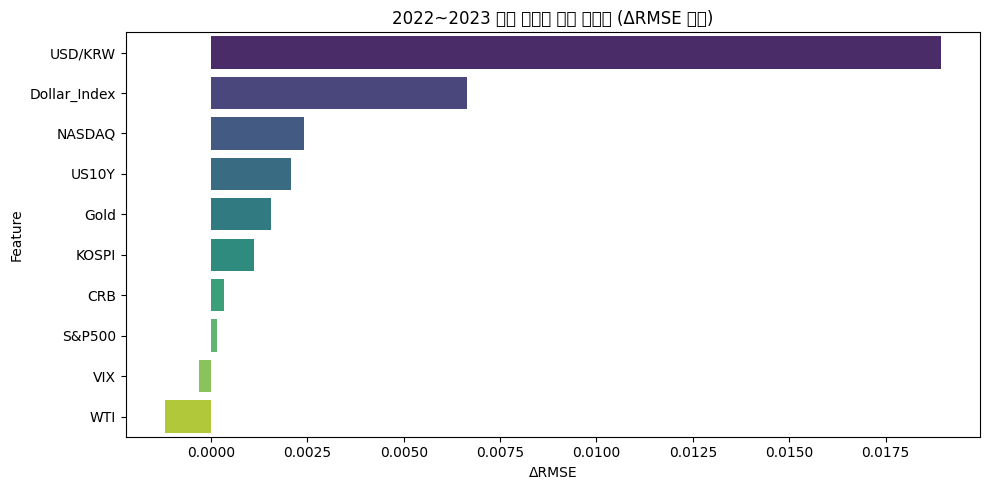

        Feature     ŒîRMSE
0       USD/KRW  0.018944
1  Dollar_Index  0.006638
5        NASDAQ  0.002415
9         US10Y  0.002079
8          Gold  0.001551
4         KOSPI  0.001102
2           CRB  0.000346
6        S&P500  0.000151
3           VIX -0.000326
7           WTI -0.001206


In [ ]:
# Î≥ÄÏàò Î™©Î°ù
features = [
    'USD/KRW', 'Dollar_Index', 'CRB', 'VIX',
    'KOSPI', 'NASDAQ', 'S&P500', 'WTI', 'Gold', 'US10Y'
]
seq_len = 10

# ÏãúÌÄÄÏä§ ÏÉùÏÑ± Ìï®Ïàò
def create_sequences(data, seq_len=10):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Î™®Îç∏ ÌïôÏäµ Ìï®Ïàò
def train_and_evaluate(df_input, model_label, return_model=False):
    df_model = df_input[features].dropna()
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df_model)
    X, y = create_sequences(scaled, seq_len)
    split_idx = int(len(X) * 0.9)
    X_train, X_val = X[:split_idx], X[split_idx:]
    y_train, y_val = y[:split_idx], y[split_idx:]

    model = Sequential([
        LSTM(64, dropout=0.2, input_shape=(X.shape[1], X.shape[2])),
        Dense(1)
    ])
    model.compile(loss='mse', optimizer='adam')
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    model.fit(X_train, y_train, validation_data=(X_val, y_val),
              epochs=50, batch_size=32, callbacks=[early_stop], verbose=1)

    pred_scaled = model.predict(X_val)
    usd_idx = features.index('USD/KRW')
    y_val_rescaled = scaler.inverse_transform(
        np.concatenate([y_val.reshape(-1, 1), np.zeros((len(y_val), len(features)-1))], axis=1)
    )[:, usd_idx]
    pred_rescaled = scaler.inverse_transform(
        np.concatenate([pred_scaled, np.zeros((len(pred_scaled), len(features)-1))], axis=1)
    )[:, usd_idx]

    rmse = np.sqrt(mean_squared_error(y_val_rescaled, pred_rescaled))
    mae = mean_absolute_error(y_val_rescaled, pred_rescaled)

    result = {'Model': model_label, 'RMSE': rmse, 'MAE': mae}
    if return_model:
        return result, model, X_val, y_val
    else:
        return result
# 2022~2023 Îç∞Ïù¥ÌÑ∞ÏÖã
df_train_recent = df[(df['ÎÇ†Ïßú'] >= "2022-01-01") & (df['ÎÇ†Ïßú'] <= "2023-12-31")].copy()

# Î™®Îç∏ ÌïôÏäµ
results_recent, model_recent, X_val_recent, y_val_recent = train_and_evaluate(df_train_recent, '2022~2023 Î≥ÄÏàò Î∂ÑÏÑùÏö© Î™®Îç∏', return_model=True)

# baseline RMSE Í≥ÑÏÇ∞
baseline_pred = model_recent.predict(X_val_recent)
baseline_rmse = np.sqrt(mean_squared_error(y_val_recent, baseline_pred))

# Permutation Importance Ìï®Ïàò
def permutation_importance(model, X_val, y_val, features, baseline_rmse):
    importances = []
    for i in range(X_val.shape[2]):
        X_temp = copy.deepcopy(X_val)
        np.random.shuffle(X_temp[:, :, i])
        pred = model.predict(X_temp)
        rmse = np.sqrt(mean_squared_error(y_val, pred))
        delta = rmse - baseline_rmse
        importances.append(delta)
    return pd.DataFrame({'Feature': features, 'ŒîRMSE': importances}).sort_values(by='ŒîRMSE', ascending=False)

# Ï§ëÏöîÎèÑ Î∂ÑÏÑù Ïã§Ìñâ
importance_df = permutation_importance(model_recent, X_val_recent, y_val_recent, features, baseline_rmse)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
sns.barplot(data=importance_df, x='ŒîRMSE', y='Feature', palette='viridis')
plt.title("2022~2023 ÌõàÎ†® Î™®Îç∏Ïùò Î≥ÄÏàò Ï§ëÏöîÎèÑ (ŒîRMSE Í∏∞Ï§Ä)")
plt.tight_layout()
plt.show()

# Í≤∞Í≥º ÌôïÏù∏
print(importance_df)

##1-7 ÎèÖÎ¶ΩÎ≥ÄÏàò : ÏÉÅÏúÑ 5Í∞ú Î≥ÄÏàò
Í∏∞Í∞Ñ: (2022-01-01", "2023-12-31)

Íµ¨Ï°∞: 10Ïùº ÏãúÌÄÄÏä§Î°ú Îã§ÏùåÎÇ† ÏòàÏ∏°

Î∂ÑÌï†: ÌïôÏäµ 90% / Í≤ÄÏ¶ù 10%

ÌèâÍ∞Ä: RMSE, MAE

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 34ms/step - loss: 0.1134 - val_loss: 0.0199
Epoch 2/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - loss: 0.0289 - val_loss: 0.0024
Epoch 3/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - loss: 0.0201 - val_loss: 0.0024
Epoch 4/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 14ms/step - loss: 0.0176 - val_loss: 0.0043
Epoch 5/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - loss: 0.0227 - val_loss: 0.0024
Epoch 6/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 14ms/step - loss: 0.0157 - val_loss: 0.0024
Epoch 7/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - loss: 0.0183 - val_loss: 0.0025
Epoch 8/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 14ms/step - loss: 0.0143 - val_loss: 0.0035
Epoch 9/50


<ipython-input-6-acc96fd80b78>:54: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-acc96fd80b78>:54: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-acc96fd80b78>:54: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-acc96fd80b78>:54: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-acc96fd80b78>:54: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-acc96fd80b78>:54: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-acc96fd80b78>:54: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-inpu

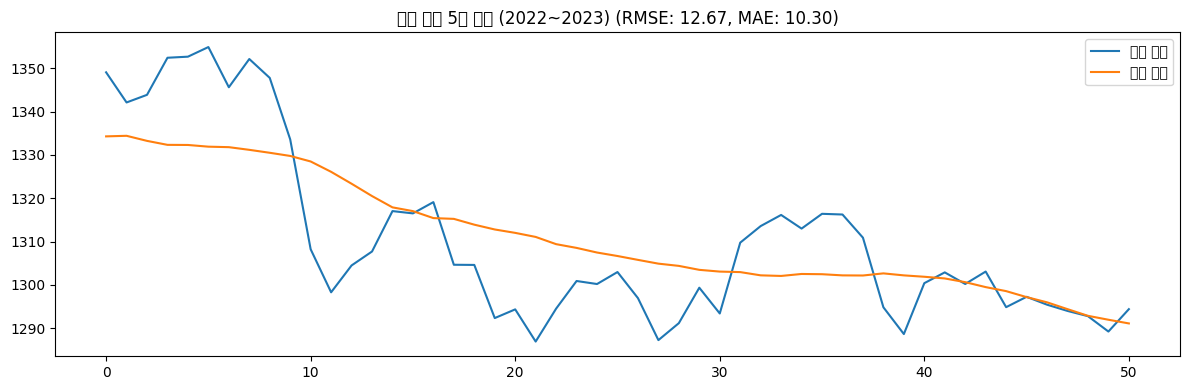

{'Model': 'ÏÉÅÏúÑ Î≥ÄÏàò 5Í∞ú Î™®Îç∏ (2022~2023)', 'RMSE': np.float64(12.667048617108255), 'MAE': 10.295110776751645}


In [ ]:
#ÏÇ¨Ïö© Î≥ÄÏàò ÏÑ§Ï†ï
top_features = ['USD/KRW', 'Dollar_Index', 'NASDAQ', 'US10Y', 'Gold']
seq_len = 10

#ÏãúÌÄÄÏä§ ÏÉùÏÑ± Ìï®Ïàò (ÏàòÏ†ïÎêú features ÏÇ¨Ïö©)
def create_sequences_lite(data, seq_len=10):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i])
        y.append(data[i, 0])  # Ìï≠ÏÉÅ Ï≤´ Î≤àÏß∏Í∞Ä ÌÉÄÍ≤ü
    return np.array(X), np.array(y)

#Î™®Îç∏ ÌïôÏäµ Ìï®Ïàò (ÏÉÅÏúÑ Î≥ÄÏàòÏö©)
def train_lite_model(df_input, model_label):
    df_model = df_input[top_features].dropna()
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df_model)

    X, y = create_sequences_lite(scaled, seq_len)
    split_idx = int(len(X) * 0.9)
    X_train, X_val = X[:split_idx], X[split_idx:]
    y_train, y_val = y[:split_idx], y[split_idx:]

    model = Sequential([
        LSTM(64, dropout=0.2, input_shape=(X.shape[1], X.shape[2])),
        Dense(1)
    ])
    model.compile(loss='mse', optimizer='adam')
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    model.fit(X_train, y_train, validation_data=(X_val, y_val),
              epochs=50, batch_size=32, callbacks=[early_stop], verbose=1)

    # ÏòàÏ∏°
    pred_scaled = model.predict(X_val)
    usd_idx = top_features.index('USD/KRW')
    y_val_rescaled = scaler.inverse_transform(
        np.concatenate([y_val.reshape(-1, 1), np.zeros((len(y_val), len(top_features)-1))], axis=1)
    )[:, usd_idx]
    pred_rescaled = scaler.inverse_transform(
        np.concatenate([pred_scaled, np.zeros((len(pred_scaled), len(top_features)-1))], axis=1)
    )[:, usd_idx]

    # ÌèâÍ∞Ä
    rmse = np.sqrt(mean_squared_error(y_val_rescaled, pred_rescaled))
    mae = mean_absolute_error(y_val_rescaled, pred_rescaled)

    # Í≤∞Í≥º ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(12, 4))
    plt.plot(y_val_rescaled, label='Ïã§Ï†ú ÌôòÏú®')
    plt.plot(pred_rescaled, label='ÏòàÏ∏° ÌôòÏú®')
    plt.title(f'{model_label} (RMSE: {rmse:.2f}, MAE: {mae:.2f})')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return {'Model': model_label, 'RMSE': rmse, 'MAE': mae}

#2022~2023 Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
df_lite = df[(df['ÎÇ†Ïßú'] >= "2022-01-01") & (df['ÎÇ†Ïßú'] <= "2023-12-31")].copy()

#ÌïôÏäµ Î∞è ÌèâÍ∞Ä Ïã§Ìñâ
lite_results = train_lite_model(df_lite, 'ÏÉÅÏúÑ Î≥ÄÏàò 5Í∞ú Î™®Îç∏ (2022~2023)')
print(lite_results)


##1-8 ÎèÖÎ¶ΩÎ≥ÄÏàò : ÏÉÅÏúÑ 5Í∞ú Î≥ÄÏàò + ÎπÑÌä∏ÏΩîÏù∏
Í∏∞Í∞Ñ: (2022-01-01", "2023-12-31)

Íµ¨Ï°∞: 10Ïùº ÏãúÌÄÄÏä§Î°ú Îã§ÏùåÎÇ† ÏòàÏ∏°

Î∂ÑÌï†: ÌïôÏäµ 90% / Í≤ÄÏ¶ù 10%

ÌèâÍ∞Ä: RMSE, MAE

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 33ms/step - loss: 0.1822 - val_loss: 0.0692
Epoch 2/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - loss: 0.0366 - val_loss: 0.0058
Epoch 3/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - loss: 0.0298 - val_loss: 0.0069
Epoch 4/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 14ms/step - loss: 0.0203 - val_loss: 0.0032
Epoch 5/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - loss: 0.0197 - val_loss: 0.0026
Epoch 6/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - loss: 0.0186 - val_loss: 0.0025
Epoch 7/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 12ms/step - loss: 0.0206 - val_loss: 0.0025
Epoch 8/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - loss: 0.0189 - val_loss: 0.0027
Epoch 9/50


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 206ms/step


<ipython-input-7-54d2236c6821>:54: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-54d2236c6821>:54: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-54d2236c6821>:54: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-54d2236c6821>:54: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-54d2236c6821>:54: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-54d2236c6821>:54: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-54d2236c6821>:54: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7

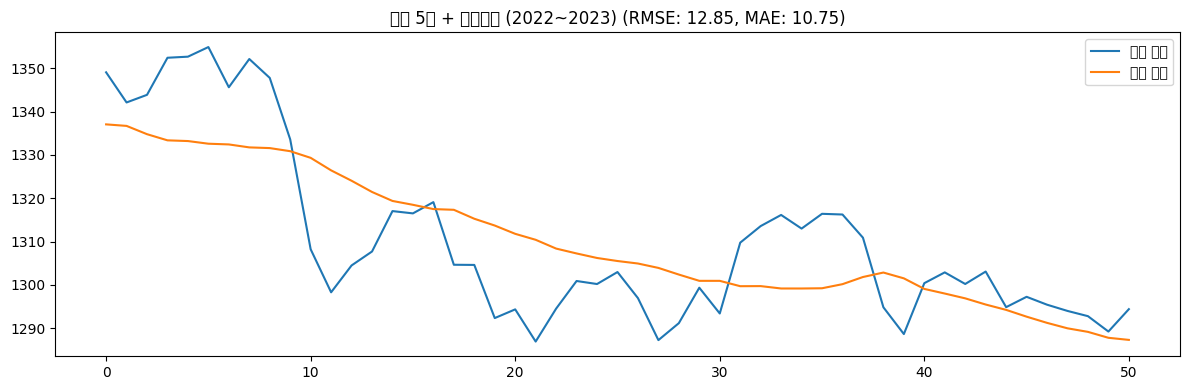

{'Model': 'ÏÉÅÏúÑ 5Í∞ú + ÎπÑÌä∏ÏΩîÏù∏ (2022~2023)', 'RMSE': np.float64(12.850971412954518), 'MAE': 10.754963575017227}


In [ ]:
#Î≥ÄÏàò ÏÑ§Ï†ï
features_btc = ['USD/KRW', 'Dollar_Index', 'NASDAQ', 'US10Y', 'Gold', 'Bitcoin']
seq_len = 10

#ÏãúÌÄÄÏä§ ÏÉùÏÑ± Ìï®Ïàò
def create_sequences_btc(data, seq_len=10):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

#Î™®Îç∏ ÌïôÏäµ Ìï®Ïàò
def train_btc_model(df_input, model_label):
    df_model = df_input[features_btc].dropna()
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df_model)

    X, y = create_sequences_btc(scaled, seq_len)
    split_idx = int(len(X) * 0.9)
    X_train, X_val = X[:split_idx], X[split_idx:]
    y_train, y_val = y[:split_idx], y[split_idx:]

    model = Sequential([
        LSTM(64, dropout=0.2, input_shape=(X.shape[1], X.shape[2])),
        Dense(1)
    ])
    model.compile(loss='mse', optimizer='adam')
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    model.fit(X_train, y_train, validation_data=(X_val, y_val),
              epochs=50, batch_size=32, callbacks=[early_stop], verbose=1)

    # ÏòàÏ∏°
    pred_scaled = model.predict(X_val)
    usd_idx = features_btc.index('USD/KRW')
    y_val_rescaled = scaler.inverse_transform(
        np.concatenate([y_val.reshape(-1, 1), np.zeros((len(y_val), len(features_btc)-1))], axis=1)
    )[:, usd_idx]
    pred_rescaled = scaler.inverse_transform(
        np.concatenate([pred_scaled, np.zeros((len(pred_scaled), len(features_btc)-1))], axis=1)
    )[:, usd_idx]

    # ÌèâÍ∞Ä
    rmse = np.sqrt(mean_squared_error(y_val_rescaled, pred_rescaled))
    mae = mean_absolute_error(y_val_rescaled, pred_rescaled)

    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(12, 4))
    plt.plot(y_val_rescaled, label='Ïã§Ï†ú ÌôòÏú®')
    plt.plot(pred_rescaled, label='ÏòàÏ∏° ÌôòÏú®')
    plt.title(f'{model_label} (RMSE: {rmse:.2f}, MAE: {mae:.2f})')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return {'Model': model_label, 'RMSE': rmse, 'MAE': mae}

#Ïã§Ìñâ: 2022~2023 Íµ¨Í∞ÑÏúºÎ°ú ÌïôÏäµ
df_btc = df[(df['ÎÇ†Ïßú'] >= "2022-01-01") & (df['ÎÇ†Ïßú'] <= "2023-12-31")].copy()
btc_result = train_btc_model(df_btc, 'ÏÉÅÏúÑ 5Í∞ú + ÎπÑÌä∏ÏΩîÏù∏ (2022~2023)')
print(btc_result)


##1-8 ÎèÖÎ¶ΩÎ≥ÄÏàò : ÌôòÏú® Îã®ÎèÖ
Í∏∞Í∞Ñ: (2022-01-01", "2023-12-31)

Íµ¨Ï°∞: 10Ïùº ÏãúÌÄÄÏä§Î°ú Îã§ÏùåÎÇ† ÏòàÏ∏°

Î∂ÑÌï†: ÌïôÏäµ 90% / Í≤ÄÏ¶ù 10%

ÌèâÍ∞Ä: RMSE, MAE

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 34ms/step - loss: 0.1344 - val_loss: 0.0086
Epoch 2/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - loss: 0.0444 - val_loss: 0.0075
Epoch 3/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 13ms/step - loss: 0.0304 - val_loss: 0.0026
Epoch 4/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - loss: 0.0292 - val_loss: 0.0031
Epoch 5/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - loss: 0.0263 - val_loss: 0.0028
Epoch 6/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - loss: 0.0251 - val_loss: 0.0028
Epoch 7/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - loss: 0.0328 - val_loss: 0.0035
Epoch 8/50
15/15 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - loss: 0.0245 - val_loss: 0.0028
2/2 ‚îÅ‚îÅ‚

<ipython-input-10-35fb195681a7>:52: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-35fb195681a7>:52: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-35fb195681a7>:52: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-35fb195681a7>:52: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-35fb195681a7>:52: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-35fb195681a7>:52: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-35fb195681a7>:52: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipyth

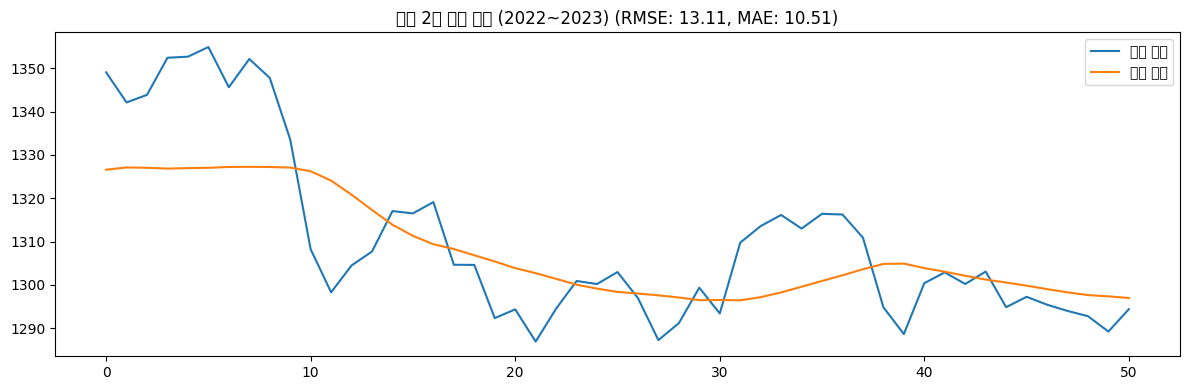

{'Model': 'ÏÉÅÏúÑ 2Í∞ú Î≥ÄÏàò Î™®Îç∏ (2022~2023)', 'RMSE': np.float64(13.105226033011842), 'MAE': 10.506374567934111}


In [ ]:
#ÏÉÅÏúÑ 2Í∞ú Î≥ÄÏàò
top3_features = ['USD/KRW']
seq_len = 10

#ÏãúÌÄÄÏä§ ÏÉùÏÑ± Ìï®Ïàò
def create_sequences_top3(data, seq_len=10):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

#Î™®Îç∏ ÌïôÏäµ Ìï®Ïàò
def train_top3_model(df_input, model_label):
    df_model = df_input[top3_features].dropna()
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df_model)

    X, y = create_sequences_top3(scaled, seq_len)
    split_idx = int(len(X) * 0.9)
    X_train, X_val = X[:split_idx], X[split_idx:]
    y_train, y_val = y[:split_idx], y[split_idx:]

    model = Sequential([
        LSTM(64, dropout=0.2, input_shape=(X.shape[1], X.shape[2])),
        Dense(1)
    ])
    model.compile(loss='mse', optimizer='adam')
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    model.fit(X_train, y_train, validation_data=(X_val, y_val),
              epochs=50, batch_size=32, callbacks=[early_stop], verbose=1)

    pred_scaled = model.predict(X_val)
    usd_idx = top3_features.index('USD/KRW')
    y_val_rescaled = scaler.inverse_transform(
        np.concatenate([y_val.reshape(-1, 1), np.zeros((len(y_val), len(top3_features)-1))], axis=1)
    )[:, usd_idx]
    pred_rescaled = scaler.inverse_transform(
        np.concatenate([pred_scaled, np.zeros((len(pred_scaled), len(top3_features)-1))], axis=1)
    )[:, usd_idx]

    rmse = np.sqrt(mean_squared_error(y_val_rescaled, pred_rescaled))
    mae = mean_absolute_error(y_val_rescaled, pred_rescaled)

    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(12, 4))
    plt.plot(y_val_rescaled, label='Ïã§Ï†ú ÌôòÏú®')
    plt.plot(pred_rescaled, label='ÏòàÏ∏° ÌôòÏú®')
    plt.title(f'{model_label} (RMSE: {rmse:.2f}, MAE: {mae:.2f})')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return {'Model': model_label, 'RMSE': rmse, 'MAE': mae}


#2022~2023 Îç∞Ïù¥ÌÑ∞ÏÖã
df_top3 = df[(df['ÎÇ†Ïßú'] >= "2022-01-01") & (df['ÎÇ†Ïßú'] <= "2023-12-31")].copy()

#ÌïôÏäµ Î∞è ÌèâÍ∞Ä Ïã§Ìñâ
result_top3 = train_top3_model(df_top3, "ÏÉÅÏúÑ 2Í∞ú Î≥ÄÏàò Î™®Îç∏ (2022~2023)")
print(result_top3)
